# Machine Learning Foundation

## Course 4, Part c: Clustering Methods LAB


# Clustering Methods Exercises


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
os.chdir('/users/salahkaf/desktop/Data')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### 1 - General Information About the Dataset

In [2]:
data = pd.read_csv('dry_bean.csv')

In [3]:
data.head().T

0           1           2           3           4
Area                  28395       28734       29380       30008       30140
Perimeter           610.291     638.018      624.11     645.884     620.134
MajorAxisLength  208.178117  200.524796   212.82613  210.557999  201.847882
MinorAxisLength  173.888747  182.734419  175.931143  182.516516  190.279279
AspectRation       1.197191    1.097356    1.209713    1.153638    1.060798
Eccentricity       0.549812    0.411785    0.562727    0.498616     0.33368
ConvexArea            28715       29172       29690       30724       30417
EquivDiameter    190.141097  191.272751  193.410904  195.467062  195.896503
Extent             0.763923    0.783968    0.778113    0.782681    0.773098
Solidity           0.988856    0.984986    0.989559    0.976696    0.990893
roundness          0.958027    0.887034    0.947849    0.903936    0.984877
Compactness        0.913358    0.953861    0.908774    0.928329    0.970516
ShapeFactor1       0.007332    0.006979    0.007244    0.007017    0.006697
ShapeFactor2       0.003147    0.003564    0.003048    0.003215    0.003665
ShapeFactor3       0.834222    0.909851    0.825871    0.861794      0.9419
ShapeFactor4       0.998724     0.99843    0.999066    0.994199    0.999166
Class                 SEKER       SEKER       SEKER       SEKER       SEKER

In [4]:
print('data frame shape is', data.shape)

data frame shape is (13611, 17)


In [5]:
pd.set_option("display.float", "{:.2f}".format) # Shows up to two decimal points
data.describe().T

count     mean      std      min      25%      50%  \
Area            13611.00 53048.28 29324.10 20420.00 36328.00 44652.00   
Perimeter       13611.00   855.28   214.29   524.74   703.52   794.94   
MajorAxisLength 13611.00   320.14    85.69   183.60   253.30   296.88   
MinorAxisLength 13611.00   202.27    44.97   122.51   175.85   192.43   
AspectRation    13611.00     1.58     0.25     1.02     1.43     1.55   
Eccentricity    13611.00     0.75     0.09     0.22     0.72     0.76   
ConvexArea      13611.00 53768.20 29774.92 20684.00 36714.50 45178.00   
EquivDiameter   13611.00   253.06    59.18   161.24   215.07   238.44   
Extent          13611.00     0.75     0.05     0.56     0.72     0.76   
Solidity        13611.00     0.99     0.00     0.92     0.99     0.99   
roundness       13611.00     0.87     0.06     0.49     0.83     0.88   
Compactness     13611.00     0.80     0.06     0.64     0.76     0.80   
ShapeFactor1    13611.00     0.01     0.00     0.00     0.01     0.01   
ShapeFactor2    13611.00     0.00     0.00     0.00     0.00     0.00   
ShapeFactor3    13611.00     0.64     0.10     0.41     0.58     0.64   
ShapeFactor4    13611.00     1.00     0.00     0.95     0.99     1.00   

                     75%       max  
Area            61332.00 254616.00  
Perimeter         977.21   1985.37  
MajorAxisLength   376.50    738.86  
MinorAxisLength   217.03    460.20  
AspectRation        1.71      2.43  
Eccentricity        0.81      0.91  
ConvexArea      62294.00 263261.00  
EquivDiameter     279.45    569.37  
Extent              0.79      0.87  
Solidity            0.99      0.99  
roundness           0.92      0.99  
Compactness         0.83      0.99  
ShapeFactor1        0.01      0.01  
ShapeFactor2        0.00      0.00  
ShapeFactor3        0.70      0.97  
ShapeFactor4        1.00      1.00

In [6]:
# missing values:
data.isna().sum() 

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
# Data type
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

### 2 - Target feature distribuiton 

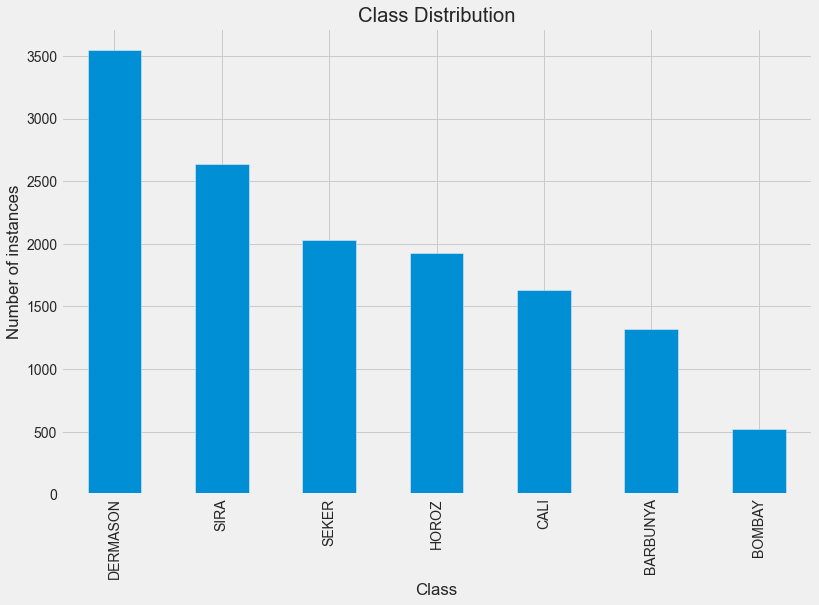

In [8]:
data.Class.value_counts().plot(kind = 'bar',figsize=(12,8))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of instances');

In [9]:
# Showing the percentage of each class
ratios = data.Class.value_counts(normalize = True).to_frame()
ratios.Class = ratios.Class*100
ratios.rename(columns = {"Class": "Class%"}, inplace=True)
ratios

Class%
DERMASON   26.05
SIRA       19.37
SEKER      14.89
HOROZ      14.17
CALI       11.98
BARBUNYA    9.71
BOMBAY      3.84

### 3 - Features Correlation

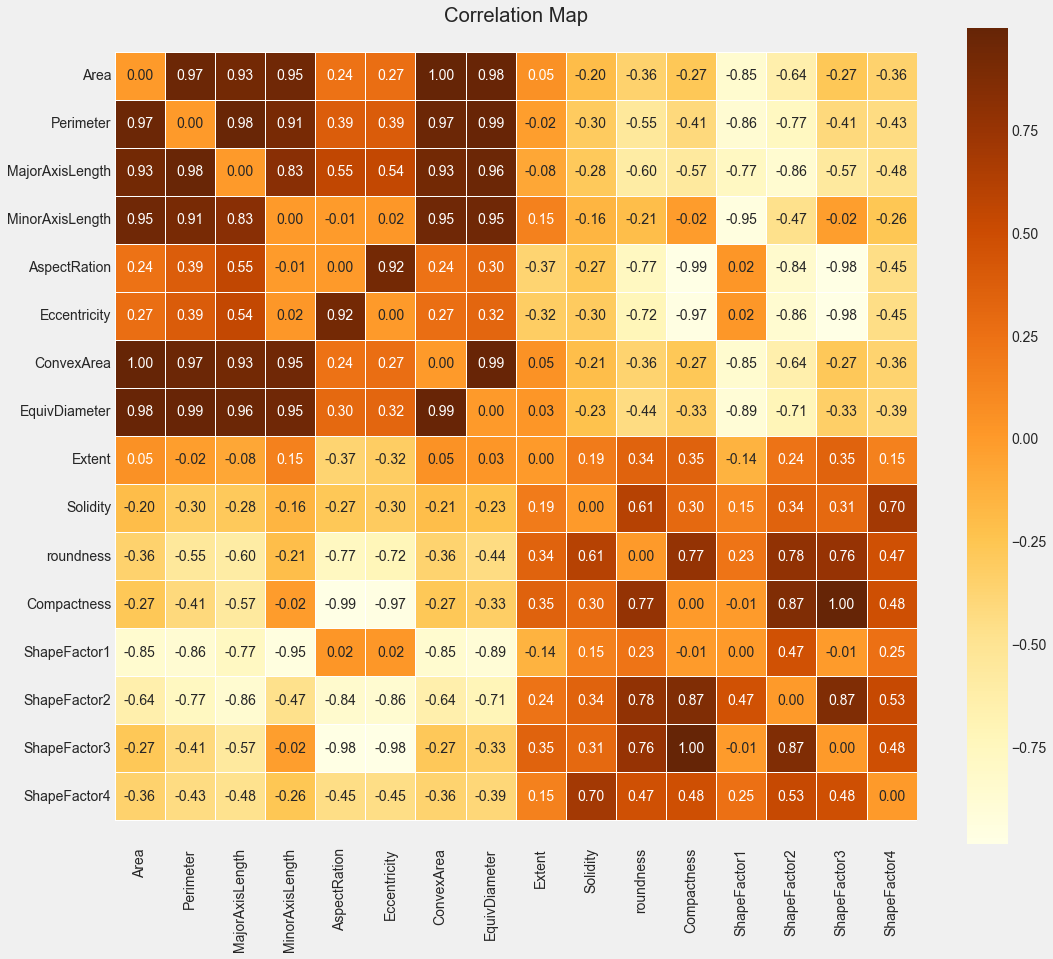

In [10]:
corr_mat = data.corr() # create corrlation matrix
for x in range(len(corr_mat)): # Make the diagonal = 0
    corr_mat.iloc[x,x] = 0.0

    
# Create the plotting figure   
fig, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrBr");
ax.set_title('Correlation Map')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [11]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         120 non-null    object 
 1   feature2         120 non-null    object 
 2   correlation      120 non-null    float64
 3   abs_correlation  120 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.9+ KB


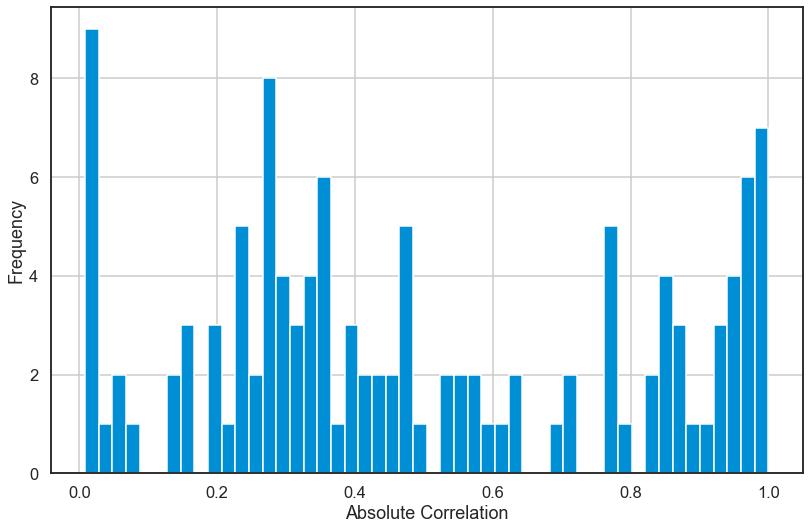

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [13]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).head()

feature1       feature2  correlation  abs_correlation
5           Area     ConvexArea         1.00             1.00
112  Compactness   ShapeFactor3         1.00             1.00
20     Perimeter  EquivDiameter         0.99             0.99
75    ConvexArea  EquivDiameter         0.99             0.99
6           Area  EquivDiameter         0.98             0.98

In [14]:
# Selecting the feature cols
feature_cols = [col for col in data.columns if col != 'Class']

### 4 - Features Skewness

And an examination of the skew values in anticipation of transformations.
- 0 : no skew
- pos : right skew
- neg : left skew

In [15]:
# Check skewness above |0.75|
skew_columns = (data[feature_cols]
                .skew()
                .abs()
                .sort_values(ascending=False)
                .to_frame("skewness_value")
                .query('skewness_value > 0.75'))

skew_columns

skewness_value
Area                       2.95
ConvexArea                 2.94
ShapeFactor4               2.76
Solidity                   2.55
MinorAxisLength            2.24
EquivDiameter              1.95
Perimeter                  1.63
MajorAxisLength            1.36
Eccentricity               1.06
Extent                     0.90

In [16]:
data[skew_columns.index.to_list()].head() # Before transformation

Area  ConvexArea  ShapeFactor4  Solidity  MinorAxisLength  EquivDiameter  \
0  28395       28715          1.00      0.99           173.89         190.14   
1  28734       29172          1.00      0.98           182.73         191.27   
2  29380       29690          1.00      0.99           175.93         193.41   
3  30008       30724          0.99      0.98           182.52         195.47   
4  30140       30417          1.00      0.99           190.28         195.90   

   Perimeter  MajorAxisLength  Eccentricity  Extent  
0     610.29           208.18          0.55    0.76  
1     638.02           200.52          0.41    0.78  
2     624.11           212.83          0.56    0.78  
3     645.88           210.56          0.50    0.78  
4     620.13           201.85          0.33    0.77

In [17]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

In [18]:
data[skew_columns.index.to_list()].head()

Area  ConvexArea  ShapeFactor4  Solidity  MinorAxisLength  EquivDiameter  \
0 10.25       10.27          0.69      0.69             5.16           5.25   
1 10.27       10.28          0.69      0.69             5.21           5.26   
2 10.29       10.30          0.69      0.69             5.18           5.27   
3 10.31       10.33          0.69      0.68             5.21           5.28   
4 10.31       10.32          0.69      0.69             5.25           5.28   

   Perimeter  MajorAxisLength  Eccentricity  Extent  
0       6.42             5.34          0.44    0.57  
1       6.46             5.31          0.34    0.58  
2       6.44             5.37          0.45    0.58  
3       6.47             5.35          0.40    0.58  
4       6.43             5.31          0.29    0.57

In [19]:
# Check skewness above |0.75|
skew_columns = (data[feature_cols]
                .skew()
                .abs()
                .sort_values(ascending=False)
                .to_frame("skewness_value")
                .query('skewness_value > 0.75'))

skew_columns

skewness_value
ShapeFactor4               2.78
Solidity                   2.58
MinorAxisLength            1.31
Eccentricity               1.26
EquivDiameter              1.07
Area                       1.07
ConvexArea                 1.07
Extent                     0.98
Perimeter                  0.84

In [20]:
### Although log transformation did not remove all skewness, the overall values of skewness have been reduced.

### 5 - Scaling data 

In [21]:
# Scaling data is extremely important in clusterting.

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data[feature_cols] = scalar.fit_transform(data[feature_cols])
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -1.28      -1.38            -1.63            -0.68         -1.57   
1 -1.25      -1.19            -1.78            -0.43         -1.97   
2 -1.20      -1.28            -1.54            -0.62         -1.51   
3 -1.15      -1.13            -1.58            -0.43         -1.74   
4 -1.14      -1.31            -1.75            -0.21         -2.12   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0         -2.22       -1.28          -1.28    0.30      0.37       1.42   
1         -3.94       -1.24          -1.25    0.70     -0.46       0.23   
2         -2.07       -1.20          -1.20    0.58      0.52       1.25   
3         -2.84       -1.12          -1.15    0.67     -2.24       0.52   
4         -4.99       -1.14          -1.14    0.48      0.80       1.87   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0         1.84          0.68          2.40          1.93          0.84  SEKER  
1         2.50          0.37          3.10          2.69          0.77  SEKER  
2         1.76          0.60          2.24          1.84          0.91  SEKER  
3         2.08          0.40          2.52          2.20         -0.20  SEKER  
4         2.77          0.12          3.27          3.01          0.94  SEKER

### 6 - Pair Plot

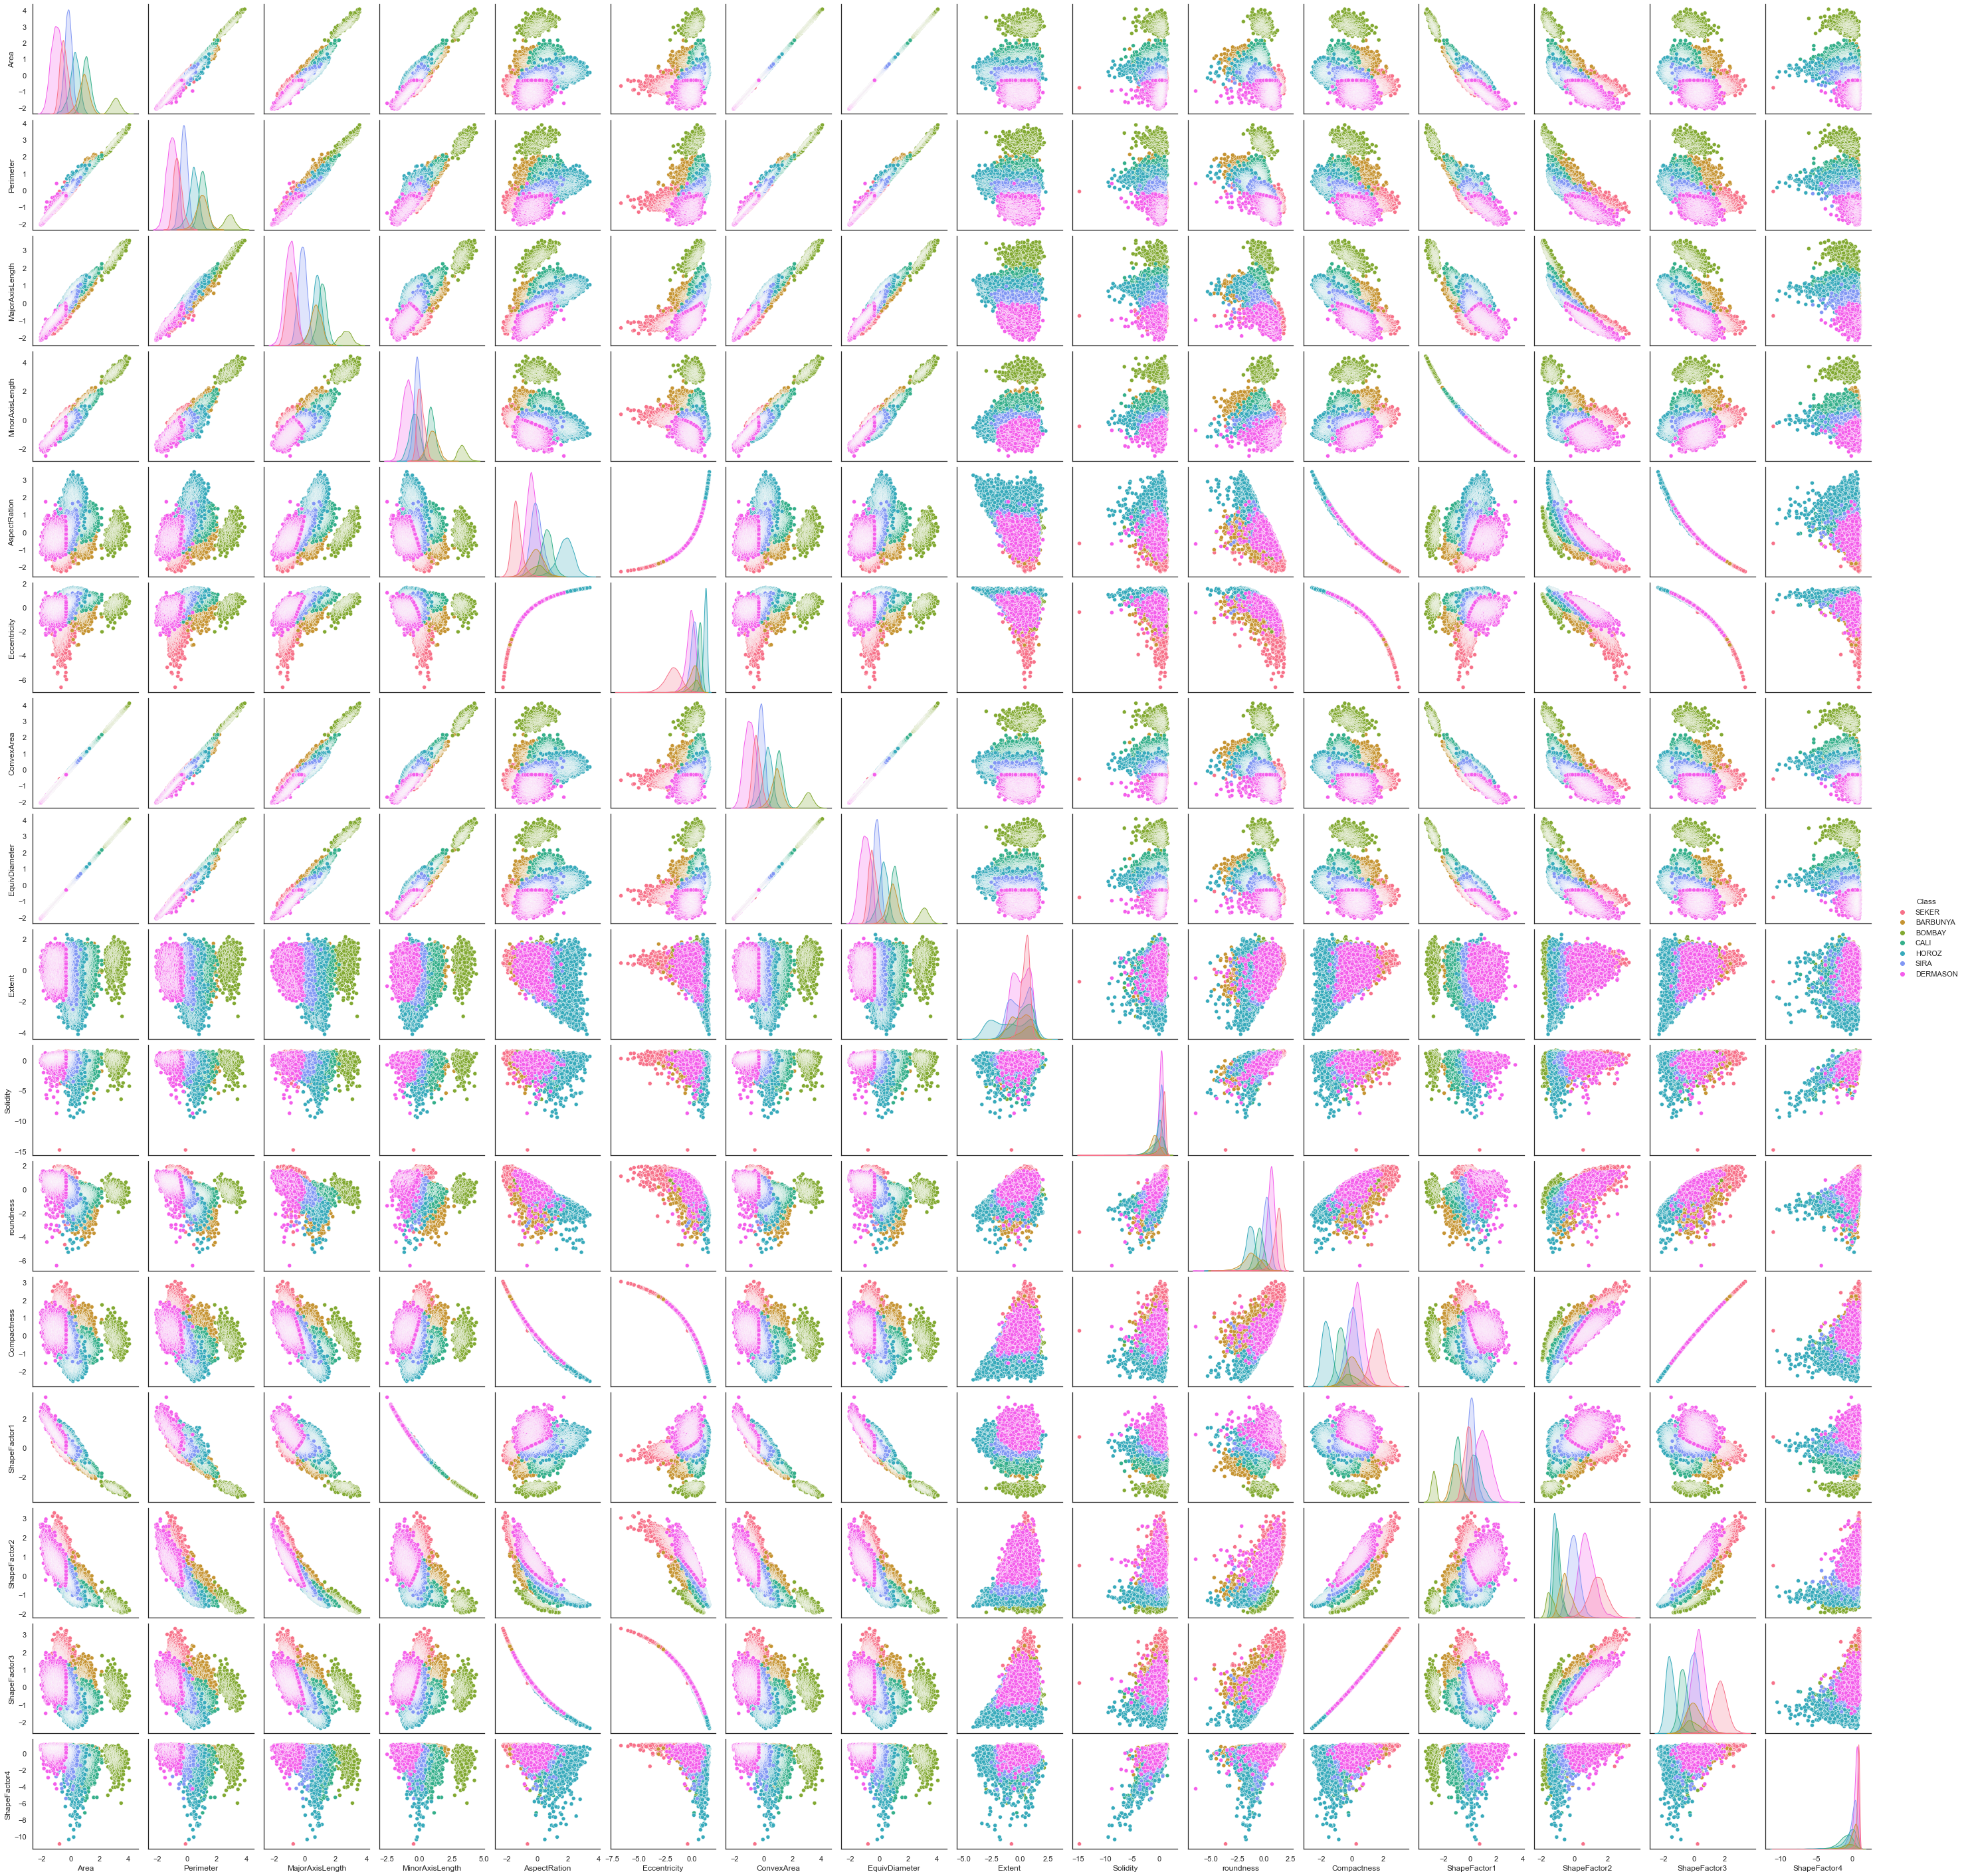

In [22]:
sns.set_context('notebook')
sns.pairplot(data,hue='Class');

### 7 - Machine learning [ K-means Clustering]

In [23]:
### BEGIN SOLUTION
from sklearn.cluster import KMeans

# Create and fit a range of models
km_list = list()

for clust in range(1,21): # Test 20 clusters 
    km = KMeans(n_clusters=clust, random_state=42) # Initiate the model
    km = km.fit(data[feature_cols])
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


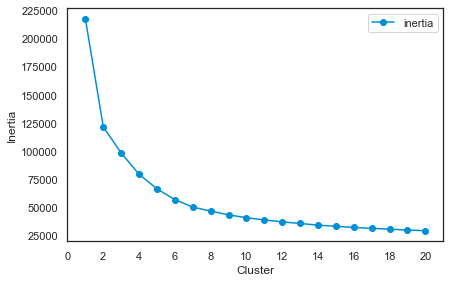

In [24]:
# Inertia elbow
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [25]:
values = data.Class.value_counts().to_frame()
values 

Class
DERMASON   3546
SIRA       2636
SEKER      2027
HOROZ      1928
CALI       1630
BARBUNYA   1322
BOMBAY      522

In [26]:
ratios

Class%
DERMASON   26.05
SIRA       19.37
SEKER      14.89
HOROZ      14.17
CALI       11.98
BARBUNYA    9.71
BOMBAY      3.84

In [27]:
pd.concat([ratios,values],axis = 1)

Class%  Class
DERMASON   26.05   3546
SIRA       19.37   2636
SEKER      14.89   2027
HOROZ      14.17   1928
CALI       11.98   1630
BARBUNYA    9.71   1322
BOMBAY      3.84    522

In [28]:
# Try 7 clusters 

km = KMeans(n_clusters=7, random_state=42)

km = km.fit (data[feature_cols])
data['k-means'] = km.predict(data[feature_cols])

In [29]:
data.sample(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
7328   0.75       0.89             1.21             0.06          2.02   
1167  -0.44      -0.64            -0.88             0.16         -1.45   
210   -0.81      -0.93            -0.93            -0.56         -0.80   
228   -0.80      -0.98            -1.19            -0.21         -1.48   
480   -0.69      -0.76            -1.09            -0.10         -1.47   
10337 -1.54      -1.44            -1.29            -1.65         -0.07   
697   -0.60      -0.73            -1.17             0.18         -1.82   
4518   1.00       1.06             1.31             0.49          1.54   
990   -0.50      -0.65            -0.92             0.08         -1.44   
8144  -0.33      -0.37            -0.36            -0.26         -0.31   

       Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
7328           1.31        0.75           0.75   -0.51     -0.57      -1.33   
1167          -1.90       -0.45          -0.44    0.24      1.23       1.61   
210           -0.61       -0.82          -0.81    0.42      1.33       1.26   
228           -1.98       -0.81          -0.80    0.26      0.99       1.72   
480           -1.94       -0.69          -0.69   -0.07      0.28       0.88   
10337          0.22       -1.53          -1.53   -1.18      0.07       0.23   
697           -3.17       -0.60          -0.60    0.10      0.28       1.21   
4518           1.15        0.99           1.00    1.04      0.87      -0.96   
990           -1.85       -0.51          -0.50    0.01      0.33       1.27   
8144          -0.01       -0.33          -0.33    1.04      0.13       0.41   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
7328         -1.76         -0.16         -1.37         -1.67         -0.20   
1167          1.67         -0.29          1.42          1.74          0.89   
210           0.80          0.53          0.97          0.78          0.72   
228           1.71          0.12          1.78          1.78          0.71   
480           1.69         -0.01          1.66          1.76          0.83   
10337        -0.04          2.02          0.83         -0.08          0.36   
697           2.24         -0.31          2.10          2.39          0.68   
4518         -1.43         -0.60         -1.32         -1.39         -0.31   
990           1.64         -0.20          1.45          1.70          0.65   
8144          0.23          0.18          0.20          0.19          0.61   

          Class  k-means  
7328      HOROZ        0  
1167      SEKER        1  
210       SEKER        2  
228       SEKER        1  
480       SEKER        1  
10337  DERMASON        2  
697       SEKER        1  
4518       CALI        5  
990       SEKER        1  
8144       SIRA        4

In [30]:
# Group by Class and K-means for comparsion between clustered classes and actual classes 
(data[['Class','k-means']] # Class vs K means
 .groupby(['k-means','Class'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
k-means Class           
0       BARBUNYA       8
        CALI          24
        DERMASON       5
        HOROZ       1663
        SIRA          82
1       BARBUNYA      13
        CALI           2
        DERMASON     104
        SEKER       1877
        SIRA          22
2       DERMASON    2755
        HOROZ          4
        SEKER         14
        SIRA          74
3       BARBUNYA       1
        BOMBAY       520
        CALI           2
4       BARBUNYA      84
        CALI          14
        DERMASON     675
        HOROZ         46
        SEKER        133
        SIRA        2421
5       BARBUNYA    1176
        CALI        1323
        HOROZ         30
        SIRA          12
6       BARBUNYA      40
        BOMBAY         2
        CALI         265
        DERMASON       7
        HOROZ        185
        SEKER          3
        SIRA          25

### 8 - Machine Learning [Hierarchical Agglomerative Clustering]

In [31]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[feature_cols])
data['agglom'] = ag.fit_predict(data[feature_cols])
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -1.28      -1.38            -1.63            -0.68         -1.57   
1 -1.25      -1.19            -1.78            -0.43         -1.97   
2 -1.20      -1.28            -1.54            -0.62         -1.51   
3 -1.15      -1.13            -1.58            -0.43         -1.74   
4 -1.14      -1.31            -1.75            -0.21         -2.12   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0         -2.22       -1.28          -1.28    0.30      0.37       1.42   
1         -3.94       -1.24          -1.25    0.70     -0.46       0.23   
2         -2.07       -1.20          -1.20    0.58      0.52       1.25   
3         -2.84       -1.12          -1.15    0.67     -2.24       0.52   
4         -4.99       -1.14          -1.14    0.48      0.80       1.87   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0         1.84          0.68          2.40          1.93          0.84  SEKER   
1         2.50          0.37          3.10          2.69          0.77  SEKER   
2         1.76          0.60          2.24          1.84          0.91  SEKER   
3         2.08          0.40          2.52          2.20         -0.20  SEKER   
4         2.77          0.12          3.27          3.01          0.94  SEKER   

   k-means  agglom  
0        1       3  
1        1       3  
2        1       3  
3        1       3  
4        1       3

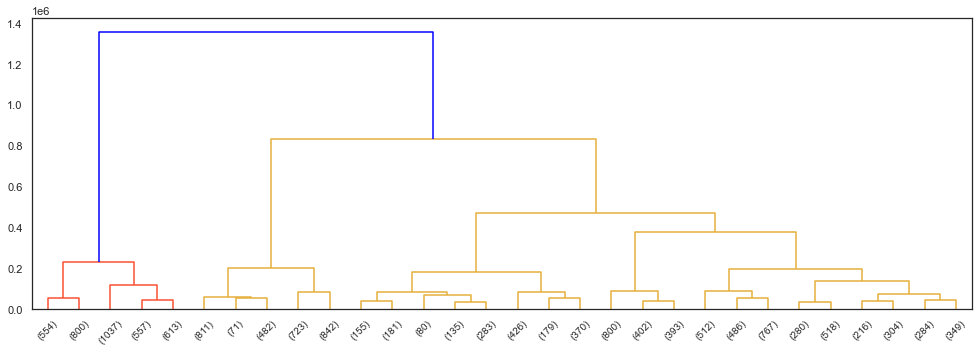

In [32]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

In [33]:
(data[['Class','agglom']]
                        .groupby(['agglom','Class'])
                        .size()
                        .to_frame()
                        .rename(columns={0:'number'}))


number
agglom Class           
0      BARBUNYA    1270
       CALI        1508
       DERMASON       1
       HOROZ         45
       SEKER          5
       SIRA          23
1      BARBUNYA       4
       CALI          33
       DERMASON      50
       HOROZ       1745
       SIRA         174
2      DERMASON    3147
       HOROZ          8
       SEKER         34
       SIRA         295
3      BARBUNYA      13
       CALI           2
       DERMASON     158
       HOROZ          1
       SEKER       1932
       SIRA         143
4      BOMBAY       522
5      BARBUNYA      32
       CALI          15
       DERMASON     189
       HOROZ         28
       SEKER         55
       SIRA        1995
6      BARBUNYA       3
       CALI          72
       DERMASON       1
       HOROZ        101
       SEKER          1
       SIRA           6

### 9 - Machine Learning [Mean Shift Clustering]

In [34]:
%%time
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2.5, n_jobs=-1) 
ms = ms.fit(data[feature_cols])

CPU times: user 14.6 s, sys: 3.25 s, total: 17.9 s
Wall time: 4min 43s


In [35]:
data['MeanShift'] = ms.fit_predict(data[feature_cols])

In [39]:
(data[['MeanShift','Class']]
                          .groupby(['MeanShift','Class'])
                          .size()
                          .to_frame()
                          .rename(columns={0:'number'}))

number
MeanShift Class           
0         BARBUNYA      28
          CALI           5
          DERMASON    3491
          HOROZ         31
          SEKER       1876
          SIRA        2049
1         BARBUNYA    1234
          CALI        1530
          HOROZ         80
          SEKER         16
          SIRA         439
2         BARBUNYA      19
          CALI          37
          DERMASON       6
          HOROZ       1689
          SIRA         139
3         BARBUNYA       2
          BOMBAY       504
          CALI           5
4         CALI           7
          HOROZ         45
          SIRA           1
5         HOROZ          7
6         DERMASON       1
          HOROZ         14
7         BARBUNYA      13
          CALI          44
          HOROZ         52
          SIRA           3
8         DERMASON      10
          HOROZ          2
          SIRA           2
9         DERMASON      14
          SEKER          1
          SIRA           2
10        BOMBAY        13
11        BOMBAY         5
12        CALI           1
          HOROZ          1
13        BARBUNYA       9
          HOROZ          3
14        CALI           1
          HOROZ          4
15        BARBUNYA      14
          DERMASON       1
          SEKER         10
          SIRA           1
16        BARBUNYA       3
          SEKER        119
17        SEKER          1
18        DERMASON       1
19        DERMASON      22
          SEKER          4

### 10 - Machine Learning [DBSCAN Clustering]

In [55]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=1.5, min_samples=4, metric='euclidean')
data['DBSCAN'] = dbs.fit_predict(data[feature_cols])

In [56]:
(data[['Class','DBSCAN']]
                        .groupby(['DBSCAN','Class'])
                        .size()
                        .to_frame()
                        .rename(columns={0:'number'}))

number
DBSCAN Class           
-1     BARBUNYA      23
       BOMBAY        10
       CALI           8
       DERMASON      25
       HOROZ         59
       SEKER         11
       SIRA          11
 0     BARBUNYA    1299
       BOMBAY       512
       CALI        1622
       DERMASON    3516
       HOROZ       1869
       SEKER       2016
       SIRA        2625
 1     DERMASON       5

### In conlusion, K-means and agglomerative clustering perfromed better than mean shift and DBSCAN.